# Imports


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

# Constants

In [ ]:
TRAIN_TEST_RATIO = 0.7
TIME_STEP = 30
SCALE = MinMaxScaler(feature_range = (0, 1))

# Data Preprocess
- load & fetch targeted data
- prepare datasets
- prepare training data
- prepare test data



### load & fetch targeted data

Mounted at /content/drive
        Date        Open        High         Low       Close   Adj Close  \
0  9/17/2014  465.864014  468.174011  452.421997  457.334015  457.334015   
1  9/18/2014  456.859985  456.859985  413.104004  424.440002  424.440002   
2  9/19/2014  424.102997  427.834991  384.532013  394.795990  394.795990   
3  9/20/2014  394.673004  423.295990  389.882996  408.903992  408.903992   
4  9/21/2014  408.084991  412.425995  393.181000  398.821014  398.821014   

       Volume  
0  21056800.0  
1  34483200.0  
2  37919700.0  
3  36863600.0  
4  26580100.0  


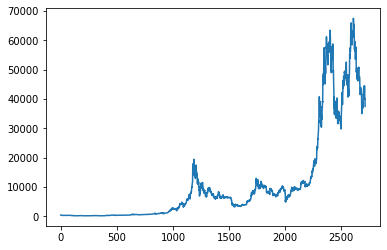

In [ ]:
drive.mount('/content/drive')
with open('drive/MyDrive/BTC-USD.csv', 'r') as data_file:
    df = pd.read_csv(data_file)
    print(df.head(5))
    closing_prices = df['Close'].values
    plt.plot(closing_prices)
    plt.show()

### prepare datasets

In [ ]:
total_dataset = closing_prices.reshape(-1, 1)
training_set = total_dataset[:int(len(closing_prices) * TRAIN_TEST_RATIO)]
test_set = total_dataset[int(len(closing_prices) * TRAIN_TEST_RATIO):]

### prepare training data

In [ ]:
training_set_scaled = SCALE.fit_transform(training_set)

x_train = []
y_train = []

for i in range(TIME_STEP, len(training_set_scaled)):
    x_train.append(training_set_scaled[i - TIME_STEP:i, 0])
    y_train.append(training_set_scaled[i:i + 1, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### prepare test data

In [ ]:
model_test_set = total_dataset[len(total_dataset) - len(test_set) - TIME_STEP:]
model_test_set_scaled = SCALE.fit_transform(model_test_set)

x_test = []
for i in range(TIME_STEP, len(model_test_set_scaled)):
    x_test.append(model_test_set_scaled[i - TIME_STEP:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


# Train model
- build & compile model
- train model

### build & compile model

In [ ]:
model = Sequential([
  GRU(TIME_STEP, return_sequences=True, input_shape=(x_train.shape[1], 1)),
  Dropout(0.20),
  GRU(TIME_STEP * 2, return_sequences=True),
  Dropout(0.20),
  GRU(TIME_STEP * 2, return_sequences=True),
  Dropout(0.20),
  GRU(TIME_STEP),
  Dropout(0.20),
  Dense(1)
])

model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 30, 30)            2970      
                                                                 
 dropout_8 (Dropout)         (None, 30, 30)            0         
                                                                 
 gru_9 (GRU)                 (None, 30, 60)            16560     
                                                                 
 dropout_9 (Dropout)         (None, 30, 60)            0         
                                                                 
 gru_10 (GRU)                (None, 30, 60)            21960     
                                                                 
 dropout_10 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_11 (GRU)                (None, 30)               

### train model

In [ ]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_split=0.3, verbose=1)

Epoch 1/20
41/41 [==============================] - 9s 74ms/step - loss: 0.0304 - val_loss: 0.0478
Epoch 2/20
41/41 [==============================] - 2s 38ms/step - loss: 0.0262 - val_loss: 0.0367
Epoch 3/20
41/41 [==============================] - 2s 38ms/step - loss: 0.0231 - val_loss: 0.0377
Epoch 4/20
41/41 [==============================] - 2s 38ms/step - loss: 0.0209 - val_loss: 0.0338
Epoch 5/20
41/41 [==============================] - 2s 38ms/step - loss: 0.0175 - val_loss: 0.0229
Epoch 6/20
41/41 [==============================] - 2s 38ms/step - loss: 0.0148 - val_loss: 0.0199
Epoch 7/20
41/41 [==============================] - 2s 38ms/step - loss: 0.0122 - val_loss: 0.0176
Epoch 8/20
41/41 [==============================] - 2s 38ms/step - loss: 0.0093 - val_loss: 0.0126
Epoch 9/20
41/41 [==============================] - 2s 38ms/step - loss: 0.0071 - val_loss: 0.0082
Epoch 10/20
41/41 [==============================] - 2s 38ms/step - loss: 0.0054 - val_loss: 0.0070
Epoch 11/

# Make Prediction
- predict
- visualize

### predict

In [ ]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price = SCALE.inverse_transform(predicted_stock_price)

### visualize

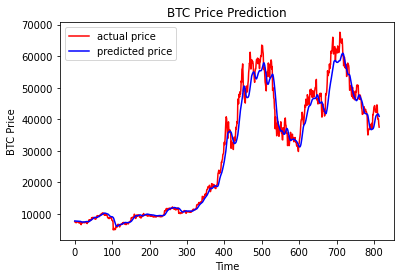

In [ ]:
plt.plot(test_set, color = "red", label = "actual price")
plt.plot(predicted_stock_price, color = "blue", label = "predicted price")
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()

# Resources
- Historical data
 - [Forex data](https://eatradingacademy.com/software/forex-historical-data/)
 - [Yahoo finance](https://finance.yahoo.com/)
- RNN tutorial
 - [Recurrent Neural Networks Stanford University (recommended)](https://www.youtube.com/watch?v=6niqTuYFZLQ)
 - [شبکه عصبی LSTM](https://howsam.org/lstm-neural-network)
 - [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
 - [Build a Recurrent Neural Network from Scratch in Python](https://www.analyticsvidhya.com/blog/2019/01/fundamentals-deep-learning-recurrent-neural-networks-scratch-python/)
- Stock market prediction
 - [Deep Learning-Based Stock Price Prediction Using LSTM and Bi-Directional LSTM Model](https://www.researchgate.net/publication/347044815_Deep_Learning-Based_Stock_Price_Prediction_Using_LSTM_and_Bi-Directional_LSTM_Model)
 - [Predicting Stock Prices with LSTMs: One Mistake Everyone Makes](https://www.youtube.com/watch?v=Vfx1L2jh2Ng)
 - [LSTM time series forecasting](https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f)
- General
 - [TensorFlow 2 quickstart for beginners
](https://www.tensorflow.org/tutorials/quickstart/beginner)
 - [TensorFlow 2.0 Complete Course](https://www.youtube.com/watch?v=tPYj3fFJGjk)
 - [Is your model overfitting? Or maybe underfitting?](https://towardsdatascience.com/is-your-model-overfitting-or-maybe-underfitting-an-example-using-a-neural-network-in-python-4faf155398d2)
 - [Hyper-Parameter Tuning](https://scikit-learn.org/stable/modules/grid_search.html)